In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
merged_df = pd.read_csv('merged_df.csv', encoding='iso-8859-1')

merged_df.sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,domain_code,domain,population_element_code,population_element,population_item_code,population_item,year_code,year,population_unit,value,flag,flag_description,note,years_existing,average_production,value_per_capita,iso_alpha3,continent
3091,CPV,35,Cabo Verde,2633,Cocoa Beans and products,5142,Food,1000 tonnes,16.00,-24.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,546.388,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,0.000000,0.546388,CPV,Africa
12272,MLI,133,Mali,2561,Sesame seed,5142,Food,1000 tonnes,17.57,-4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,5.0,6.0,6.0,4.0,4.0,2.0,1.0,2.0,2.0,0.0,0.0,19,17,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,18541.980,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,1.584906,18.541980,MLI,Africa
5883,DMA,55,Dominica,2945,Offals,5142,Food,1000 tonnes,15.41,-61.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,73.925,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,0.000000,0.073925,DMA,North America


In [18]:
merged_df['element'].unique()

array(['Food', 'Feed'], dtype=object)

In [19]:
year_cols = [col for col in merged_df.columns if col.startswith('y') and col[1:].isdigit()]

In [20]:
top_5_areas = merged_df.groupby('area')['average_production'].mean().nlargest(5)
top_5_areas

area
China, mainland             9853.819979
United States of America    5582.654356
India                       5146.317939
Russian Federation          2563.625747
Brazil                      1903.076573
Name: average_production, dtype: float64

In [21]:
top_5_areas.index

Index(['China, mainland', 'United States of America', 'India',
       'Russian Federation', 'Brazil'],
      dtype='object', name='area')

In [22]:
filtered_food = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Food')
filtered_feed = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Feed')

In [23]:
merged_df[filtered_food].groupby(['area', 'item'])['average_production'].mean().reset_index()

,area,item,average_production
0,Brazil,Alcoholic Beverages,5466.849057
1,Brazil,Animal fats,380.528302
2,Brazil,Apples and products,461.320755
3,Brazil,"Aquatic Animals, Others",0.377358
4,Brazil,Aquatic Plants,0.000000
...,...,...,...
515,United States of America,Vegetables,28348.886792
516,United States of America,"Vegetables, Other",17204.660377
517,United States of America,Wheat and products,19477.000000
518,United States of America,Wine,1742.849057


In [24]:
top_5_food = merged_df[filtered_food].groupby(['area', 'item'])['average_production'].mean()
top_5_food = top_5_food.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_food

,area,item,average_production
0,Brazil,Cereals - Excluding Beer,15129.226415
1,Brazil,Milk - Excluding Butter,14177.245283
2,Brazil,Fruits - Excluding Wine,13762.622642
3,Brazil,Starchy Roots,10348.716981
4,Brazil,Meat,8237.867925
5,"China, mainland",Vegetables,170690.452830
6,"China, mainland",Cereals - Excluding Beer,163752.188679
7,"China, mainland","Vegetables, Other",150235.811321
8,"China, mainland",Starchy Roots,87244.867925
9,"China, mainland",Rice (Milled Equivalent),80586.169811


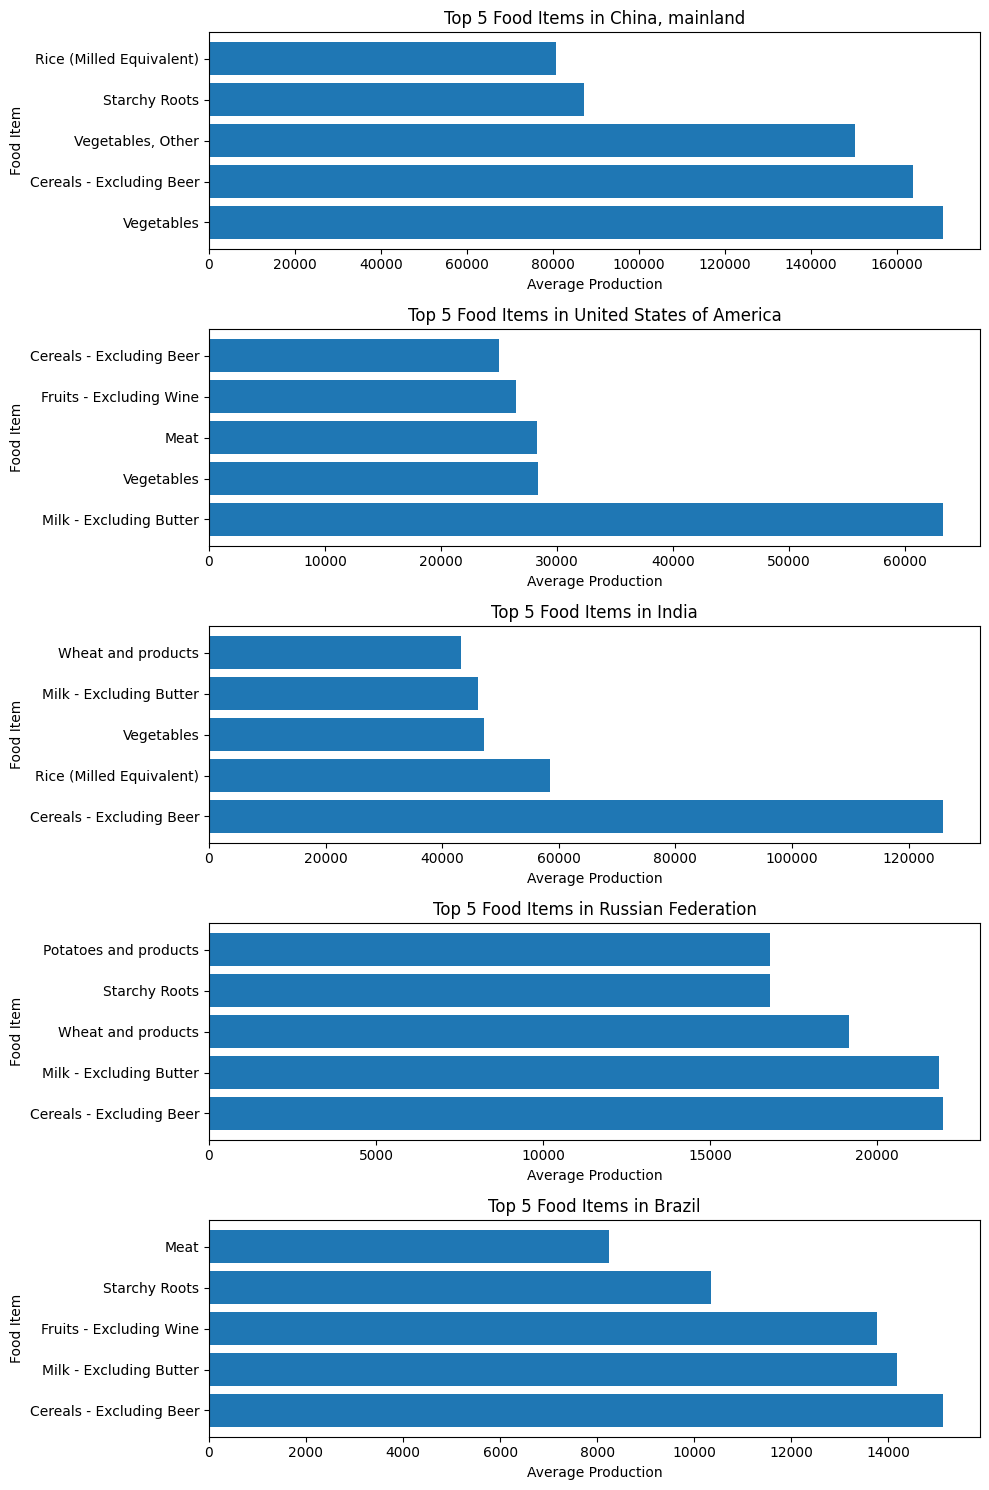

In [25]:
fig, axes = plt.subplots(nrows=len(top_5_areas), figsize=(10, 15))

for i, area in enumerate(top_5_areas.index):
    country_data = top_5_food[top_5_food['area'] == area]
    
    axes[i].barh(country_data['item'], country_data['average_production'])
    axes[i].set_title(f'Top 5 Food Items in {area}')
    axes[i].set_xlabel('Average Production')
    axes[i].set_ylabel('Food Item')

plt.tight_layout()
plt.show()

In [26]:
merged_df[filtered_feed].groupby(['area', 'item'])['average_production'].mean().reset_index()

,area,item,average_production
0,Brazil,Animal fats,3.301887
1,Brazil,Barley and products,67.603774
2,Brazil,"Butter, Ghee",0.396226
3,Brazil,Cassava and products,12162.924528
4,Brazil,Cereals - Excluding Beer,20385.754717
...,...,...,...
155,United States of America,Sunflower seed,175.245283
156,United States of America,Sweet potatoes,36.018868
157,United States of America,Vegetables,140.962264
158,United States of America,"Vegetables, Other",140.962264


In [27]:
top_5_feed = merged_df[filtered_feed].groupby(['area', 'item'])['average_production'].mean()
top_5_feed = top_5_feed.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_feed

,area,item,average_production
0,Brazil,Cereals - Excluding Beer,20385.754717
1,Brazil,Maize and products,19606.358491
2,Brazil,Starchy Roots,12620.018868
3,Brazil,Cassava and products,12162.924528
4,Brazil,Sugar Crops,7022.037736
5,"China, mainland",Cereals - Excluding Beer,77070.056604
6,"China, mainland",Maize and products,60690.716981
7,"China, mainland",Starchy Roots,47778.754717
8,"China, mainland",Sweet potatoes,34963.377358
9,"China, mainland",Rice (Milled Equivalent),9273.679245


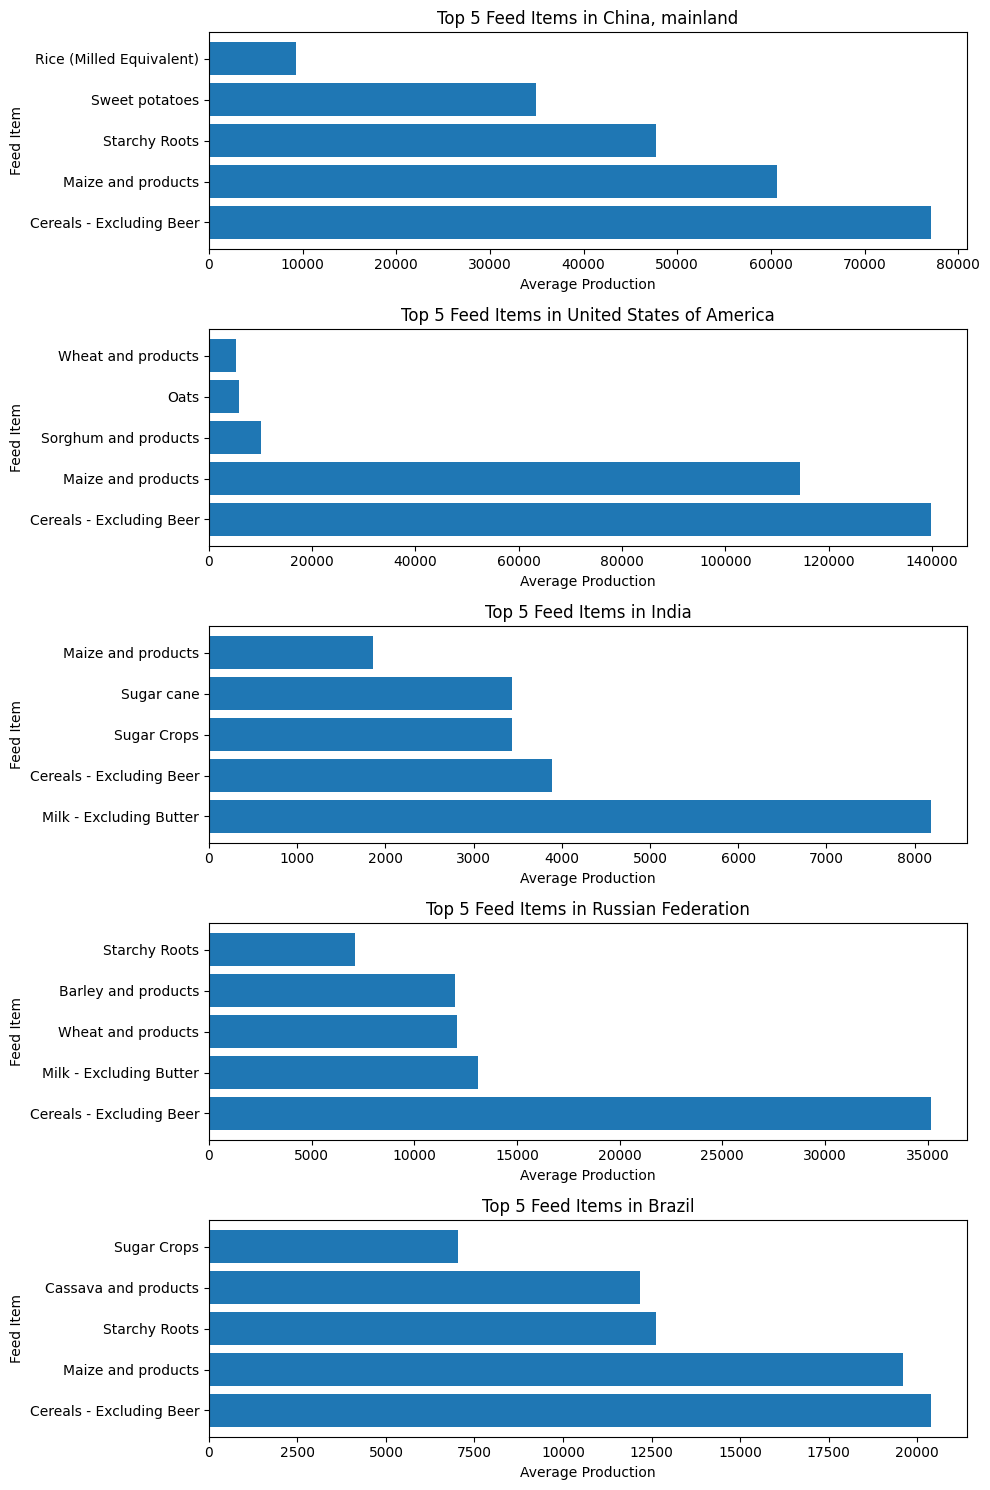

In [28]:
fig, axes = plt.subplots(nrows=len(top_5_areas), figsize=(10, 15))

for i, area in enumerate(top_5_areas.index):
    country_data = top_5_feed[top_5_feed['area'] == area]
    
    axes[i].barh(country_data['item'], country_data['average_production'])
    axes[i].set_title(f'Top 5 Feed Items in {area}')
    axes[i].set_xlabel('Average Production')
    axes[i].set_ylabel('Feed Item')

plt.tight_layout()
plt.show()